# Pemrograman 6 - Python for Data Science

- Nama            : Arman Dwi Pangestu
- NIM             : 1221604
- Program Studi   : Teknik Informatika
- Semester        : 6 (Genap)
- Mata Kuliah     : Pemrograman 6
- Dosen           : Mina Ismu Rahayu
- Tugas           : Praktikum 2 - `Praktikum Pandas`
- Tanggal         : Rabu, 31 Januari 2024

# Table of Contents atau Daftar Isi

- [Import Library atau Module](#import-library-atau-module)
    - [Pandas - Membuat Data Frame Dari Dictionary](#pandas---membuat-data-frame-dari-dictionary)
    - [Pandas - Membaca Data Dari CSV](#pandas---membaca-data-dari-csv)
        - [Data Pre Processing - Remove Duplicate Data](#data-pre-processing---remove-duplicate-data)
        - [Data Pre Processing - Formatting Column Name](#data-pre-processing---formatting-column-name)
        - [Data Pre Processing - Check Null Value](#data-pre-processing---check-null-value)
        - [Data Pre Processing - Null Value](#data-pre-processing---null-value)
        - [Data Pre Processing - Analysis Relation Between Data](#data-pre-processing---analysis-relation-between-data)
        - [Data Pre Processing - Calculating the Frequency of all values in a column](#data-pre-processing---calculating-the-frequency-of-all-values-in-a-column)
        - [Data Pre Processing - Menghitung Korelasi Antar Data](#data-pre-processing---menghitung-korelasi-antar-data)
        - [Data Pre Processing - Subset](#data-pre-processing---subset)
        - [Data Pre Processing - Slicing Data](#data-pre-processing---slicing-data)
        - [Data Pre Processing - Membuat Function](#data-pre-processing---membuat-function)
    - [Matplotlib - Plotting Data](#matplotlib---plotting-data)

# Import Library atau Module

import library `pandas` dengan alias `pd`

In [4]:
import pandas as pd

## Pandas - Membuat Data Frame Dari Dictionary

In [5]:
data = {
    'cookies': [4, 5, 6, 7],
    'cakes': [1, 2, 3, 4]
}

food = pd.DataFrame(data, index=['Michael', 'Tim', 'Mary', 'Joe'])
print(f"Food Info: \n{food.info}\n")
print(f"Food Index Joe: \n{food.loc['Joe']}")

Food Info: 
<bound method DataFrame.info of          cookies  cakes
Michael        4      1
Tim            5      2
Mary           6      3
Joe            7      4>

Food Index Joe: 
cookies    7
cakes      4
Name: Joe, dtype: int64


## Pandas - Membaca Data Dari CSV

In [6]:
movies_df = pd.read_csv("../../Resource/Pertemuan3/IMDB-Movie-Data.csv")
print("=========================")
print("| Movie Data Frame Info |")
print("=========================\n")
print(movies_df.info())

print("\n")

print("==========================")
print("| Movie Data Frame Shape |")
print("==========================\n")
print(movies_df.shape)

| Movie Data Frame Info |

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


| Movie Data Frame Shape |

(1000, 12)


### Data Pre Processing - Remove Duplicate Data

In [7]:
# Duplicate Data (Old Version Pandas Use method or attribute `append`)
'''
temp_df = movies_df.append(movies_df)
print(temp_df.shape)

# Data Pre Processing - Remove Duplicate Data
temp_df.drop_duplicates()
'''

# Duplicate Data (New Version Pandas Not Work with method or attribute `append`, use `concat`)
temp_df = pd.concat([movies_df, movies_df], ignore_index=True)
print("Shape original:", movies_df.shape)
print("Shape setelah append (duplicate data):", temp_df.shape)

# Data Pre Processing
temp_df = temp_df.drop_duplicates()
print("Shape setelah drop_duplicates:", temp_df.shape)

Shape original: (1000, 12)
Shape setelah append (duplicate data): (2000, 12)
Shape setelah drop_duplicates: (1000, 12)


### Data Pre Processing - Formatting Column Name

In [8]:
# Get List Column Name
print(movies_df.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


In [9]:
# Formating Column Name To Make Easy Query
movies_df.rename(columns={
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue_Millions'
}, inplace=True)

print(movies_df.columns)
print(movies_df.info)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')
<bound method DataFrame.info of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                            

In [10]:
# Formatting Column Name To Lower Case
movies_df.columns = [col.lower() for col in movies_df]
print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   title             1000 non-null   object 
 2   genre             1000 non-null   object 
 3   description       1000 non-null   object 
 4   director          1000 non-null   object 
 5   actors            1000 non-null   object 
 6   year              1000 non-null   int64  
 7   runtime           1000 non-null   int64  
 8   rating            1000 non-null   float64
 9   votes             1000 non-null   int64  
 10  revenue_millions  872 non-null    float64
 11  metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


### Data Pre Processing - Check Null Value

In [11]:
# Check Null Value, if the record have null, it will return `True`, if record not null, it will return `False`
print(movies_df.isnull())

# Check Data Frame Information, this method will return information about the data frame, such as:
# - Index
# - Column
# - Non-Null Count
# - Dtype
#
# On Non-Null Count we can see total data filled, so if the total record is 1000, every column must be have 1000 record
# if not 1000, the column have null value
print(movies_df.info())

# We can count how much every column have a null value using method `isnull` with chaining method `sum`
print(movies_df.isnull().sum())

      rank  title  genre  description  director  actors   year  runtime  \
0    False  False  False        False     False   False  False    False   
1    False  False  False        False     False   False  False    False   
2    False  False  False        False     False   False  False    False   
3    False  False  False        False     False   False  False    False   
4    False  False  False        False     False   False  False    False   
..     ...    ...    ...          ...       ...     ...    ...      ...   
995  False  False  False        False     False   False  False    False   
996  False  False  False        False     False   False  False    False   
997  False  False  False        False     False   False  False    False   
998  False  False  False        False     False   False  False    False   
999  False  False  False        False     False   False  False    False   

     rating  votes  revenue_millions  metascore  
0     False  False             False      False  

### Data Pre Processing - Null Value

Setelah kita mengetahui terdapat beberapa data yang null pada kolom `revenue_millions` dan `metascore`, selanjutnya kita perlu buat agar data null tersebut hilang agar konsistensi data nya terjaga. Nah, untuk melakukan hal tersebut terdapat beberapa cara diantaranya adalah:

1. Kita bisa hilangkan satu baris datanya walaupun data yang null ada di kolom `revenue_millions` atau `metascore`

Agar lebih terbayang cara kesatu ini kalian bisa lihat tabel berikut ini

| Index | Rank | Title | Genre | Description | Director | Actors | Year | Runtime | Rating | Votes | Revenue_Millions | Metascore |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |
| 500 | 1 | Guardians... | Action... | A group... | James Gunn | Chris Prat... | 2014 | 121 | 8.1 | 757074 | Null | 76.0 |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |

Nah maka yang dihapus itu satu baris index `500` atau keseluruhan data di index ke `500`, sehingga jika total keseluruhan data terdapat 1000 baris dan pada salah satu kolom memiliki nilai `Null` di index tertentu maka akan dihapus sehingga total data nya sekarang bukan lagi 1000 melainkan `999`

2. Mengisikan Data Null

Nah jika kalian tidak ingin mengurangi jumlah data nya seperti cara pertama, kita bisa gunakan cara kedua ini yaitu dengan cara mengisikan data null tersebut agar konsisten. Pengisian data null ini usahakan sesuai konteks nya, misalkan data yang null terdapat pada kolom `revenue_millions` maka kita bisa isikan data null tersebut dengan nilai mean atau nilai rata-rata dari keseluruhan `revenue_millions` nya

Pilihan dari kedua cara tersebut bergantung pada konteks data dan analisis yang akan kalian lakukan. Jika menghapus baris tidak akan mempengaruhi analisis kalian secara signifikan dan data yang hilang tidak banyak, maka pilihan pertama mungkin lebih cocok. Namun, jika data yang hilang cukup signifikan dan tidak dapat dihapus, maka pengisian data null mungkin lebih baik untuk mempertahankan jumlah total data.

Perlu dicatat bahwa dalam kasus pengisian data null, penting untuk memilih nilai pengganti yang sesuai agar tidak mempengaruhi hasil analisis secara berlebihan. Menggunakan nilai rata-rata atau median dari kolom adalah pilihan umum untuk mengisikan data null.

In [12]:
# Removing One Row Record if they have null value
#print(movies_df.dropna())
#print(movies_df.dropna(axis=0, inplace=True))
#print(movies_df.info())

# Fill the data null for column `revenu_millions`
revenue = movies_df['revenue_millions'] # Get the column `revenue_millions`
revenue_mean = revenue.mean() # Get the mean data from `revenue_miilions`
revenue.fillna(revenue_mean, inplace=True) # Fill the nulls data using `fillna()` method
print(movies_df.isnull().sum()) # Check null value from data frame
print(movies_df.info())

# Fill the data null for column `metascore`
score = movies_df['metascore'] # Get the column `metascore`
score_mean = score.mean() # Get the mean data from `metascore`
score.fillna(score_mean, inplace=True) # Fill the nulls data using `fillna()` method
print(movies_df.isnull().sum()) # Check null value from data frame
print(movies_df.info())

rank                 0
title                0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   title             1000 non-null   object 
 2   genre             1000 non-null   object 
 3   description       1000 non-null   object 
 4   director          1000 non-null   object 
 5   actors            1000 non-null   object 
 6   year              1000 non-null   int64  
 7   runtime           1000 non-null   int64  
 8   rating            1000 non-null   float64
 9   votes             1000 non-null   int64  
 10  revenue_millions  1000 non-null   fl

### Data Pre Processing - Analysis Relation Between Data

Kita dapat menganalisis hubungan antar data menggunakan method `describe`, misalkan kita ingin menganalisis data dari kolom `actors`, maka hasilnya adalah ringkasan dari data kolom `actors` tersebut seperti:

- `Count` (Jumlah data dari kolom `actors`)
- `Unique` (Jumlah data unique atau nama actors nya berbeda-beda setiap baris nya)
- `Top` (Jumlah nama actor yang sering muncul atau frekuensi muncul nya lebih banyak)
- `Freq` (Berapa kali jumlah actor yang sama muncul)

In [13]:
print(movies_df['actors'].describe())

count                                                  1000
unique                                                  996
top       Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...
freq                                                      2
Name: actors, dtype: object


Atau kita coba analisis kolom `genre`

In [14]:
print(movies_df['genre'].describe())

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object


Nah 2 contoh diatas kan data kolom yang object, kita coba data kolom yang numerical seperti float di kolom `rating`. Maka hasil analisis dari method `describe` nya juga akan berbeda sehingga tergantung data yang akan di analisis nya. Berikut jika kita coba analisis kolom `rating`

- `count` (jumlah data dari kolom `rating`)
- `mean` (nilai tengah-tengah dari `rating`)
- `std` (nilai standard deviation dari `rating`)
- `min` (nilai minimal dari `rating`)
- `25%` (nilai 25% dari `rating`)
- `50%` (nilai 50% dari `rating`)
- `75%` (nilai 75% dari `rating`)
- `max` (nilai maximal dari `rating`)

In [15]:
print(movies_df['rating'].describe())

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64


### Data Pre Processing - Calculating the Frequency of all values in a column

In [16]:
print(movies_df['genre'].value_counts().head(3))

genre
Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Name: count, dtype: int64


### Data Pre Processing - Menghitung Korelasi Antar Data

In [17]:
numeric_columns = movies_df.select_dtypes(include=['number'])
print(numeric_columns.corr(method='pearson', min_periods=1))

                      rank      year   runtime    rating     votes  \
rank              1.000000 -0.261605 -0.221739 -0.219555 -0.283876   
year             -0.261605  1.000000 -0.164900 -0.211219 -0.411904   
runtime          -0.221739 -0.164900  1.000000  0.392214  0.407062   
rating           -0.219555 -0.211219  0.392214  1.000000  0.511537   
votes            -0.283876 -0.411904  0.407062  0.511537  1.000000   
revenue_millions -0.252996 -0.117562  0.247834  0.189527  0.607941   
metascore        -0.185159 -0.076077  0.202239  0.604723  0.318116   

                  revenue_millions  metascore  
rank                     -0.252996  -0.185159  
year                     -0.117562  -0.076077  
runtime                   0.247834   0.202239  
rating                    0.189527   0.604723  
votes                     0.607941   0.318116  
revenue_millions          1.000000   0.132304  
metascore                 0.132304   1.000000  


### Data Pre Processing - Subset

In [18]:
genre = movies_df[['genre']]
print(type(genre))

subset = movies_df[['genre', 'rating']]
print(subset.head(10))

print(movies_df.info())
print(movies_df.iloc[6])

<class 'pandas.core.frame.DataFrame'>
                        genre  rating
0     Action,Adventure,Sci-Fi     8.1
1    Adventure,Mystery,Sci-Fi     7.0
2             Horror,Thriller     7.3
3     Animation,Comedy,Family     7.2
4    Action,Adventure,Fantasy     6.2
5    Action,Adventure,Fantasy     6.1
6          Comedy,Drama,Music     8.3
7                      Comedy     6.4
8  Action,Adventure,Biography     7.1
9     Adventure,Drama,Romance     7.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   title             1000 non-null   object 
 2   genre             1000 non-null   object 
 3   description       1000 non-null   object 
 4   director          1000 non-null   object 
 5   actors            1000 non-null   object 
 6   year              1000 non-null   int64  
 7   runtime   

### Data Pre Processing - Slicing Data

In [19]:
movie_subset = movies_df.iloc[1:4]
print(movie_subset)

condition = (movies_df['director'] == "Ridley Scott")
print("\nCondition:\n")
print(condition.iloc[1:4])

print("\nOr Condition:\n")
print (movies_df[movies_df['director'] == "Ridley Scott"])
print(movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head())

   rank       title                     genre  \
1     2  Prometheus  Adventure,Mystery,Sci-Fi   
2     3       Split           Horror,Thriller   
3     4        Sing   Animation,Comedy,Family   

                                         description              director  \
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   

                                              actors  year  runtime  rating  \
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117     7.3   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108     7.2   

    votes  revenue_millions  metascore  
1  485820            126.46       65.0  
2  157606            138.12       62.0  
3   60545            270.32       59.0  

Conditio

### Data Pre Processing - Membuat Function

In [22]:
def rating_function(score):
    if score >= 8.0:
        return "good"
    else:
        return "bad"

In [24]:
#movies_df['rating_category'] = movies_df['rating'].apply(rating_function) # callback rating_function with pass data rating as score and assign to new column `rating_category`
movies_df['rating_category'] = movies_df['rating'].apply(lambda score: 'good' if score >= 8.0 else 'bad') # use lambda or anonymous function, instead defining function
print(movies_df.head(2))
print(movies_df.info())

   rank                    title                     genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   

                                         description      director  \
0  A group of intergalactic criminals are forced ...    James Gunn   
1  Following clues to the origin of mankind, a te...  Ridley Scott   

                                              actors  year  runtime  rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   

    votes  revenue_millions  metascore rating_category  
0  757074            333.13       76.0            good  
1  485820            126.46       65.0             bad  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -

## Matplotlib - Plotting Data

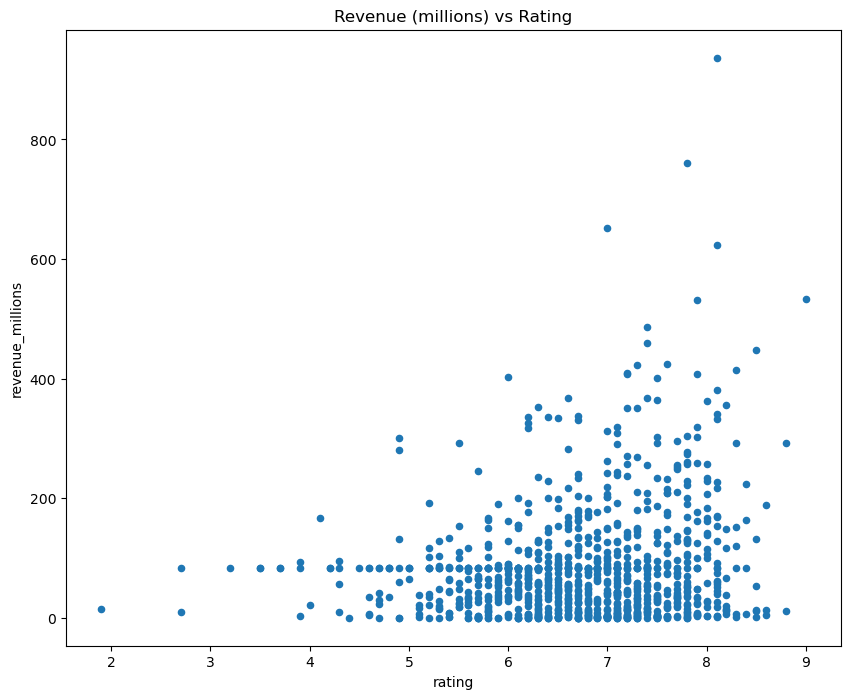

<Axes: title={'center': 'revenue_millions'}, xlabel='rating_category'>

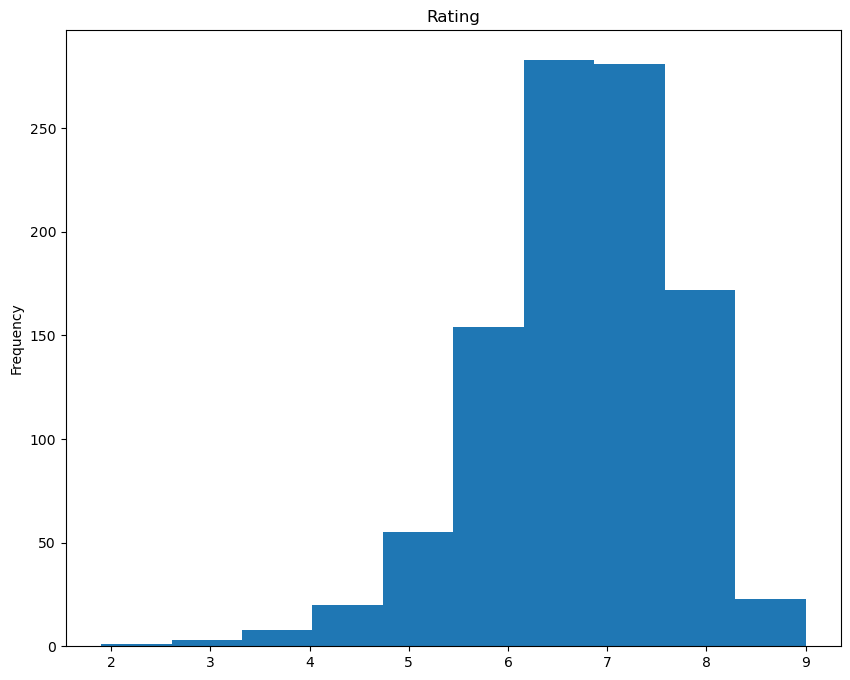

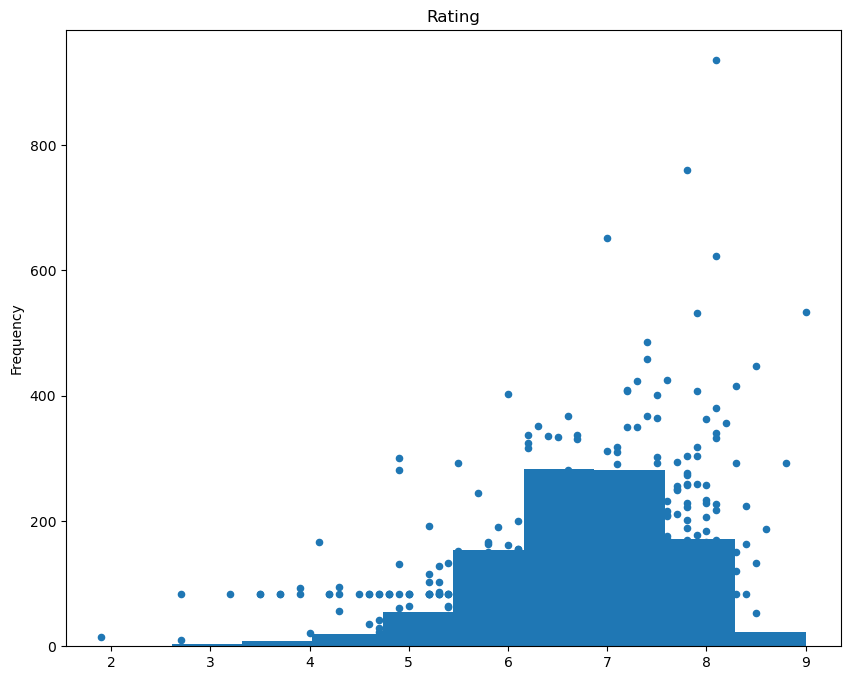

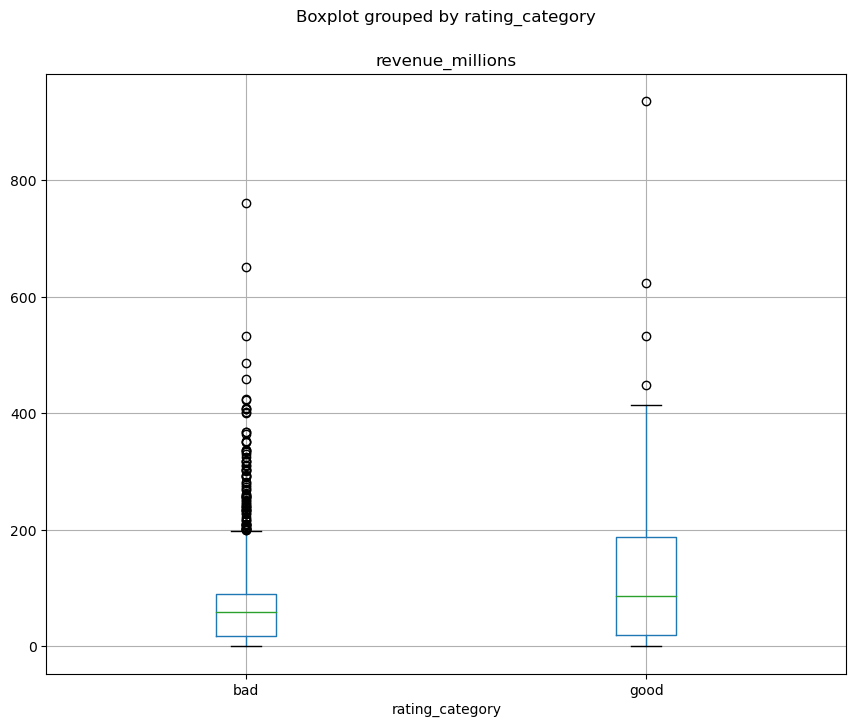

In [28]:
import matplotlib.pyplot as plt

# Set font and plot size to be larger
plt.rcParams.update({
    'font.size': 10,
    'figure.figsize': (10, 8)
})

movies_df.plot(
    kind='scatter', 
    x='rating', 
    y='revenue_millions', 
    title='Revenue (millions) vs Rating'
)

plt.show()

movies_df['rating'].plot(
    kind='hist', 
    title='Rating'
)

movies_df.plot(
    kind='scatter', 
    x='rating', 
    y='revenue_millions', 
    title='Revenue (millions) vs Rating'
)

movies_df['rating'].plot(
    kind='hist', 
    title='Rating'
)

movies_df.boxplot(
    column='revenue_millions', 
    by='rating_category'
)